# Task 1:
read the dataset and determine the optimal amount of clusters.

In [45]:
import pandas
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

data = pandas.read_csv("data/expanded")
X = pandas.get_dummies(data.drop('edibility', axis='columns')).to_numpy()
scores = []
for i in range(0,10):
    kmeans = KMeans(n_clusters=i+2)
    kmeans.fit(X)
    predicted = kmeans.predict(X)
    scores.append(silhouette_score(X, kmeans.fit_predict(X)))

print("Optimal number of clusters: ", scores.index(max(scores))+2)

Optimal number of clusters:  9


# Task 2
Plot the score

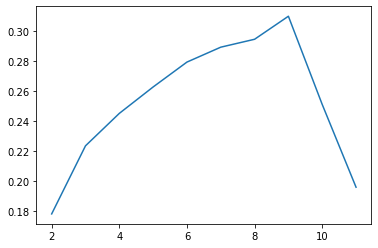

In [47]:
x_values = [x for x in range(2, 12)]

plt.plot(x_values, scores)


# Task 3
Plot an increasing number of clusters

(9, 3)


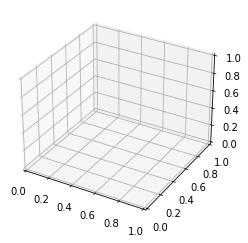

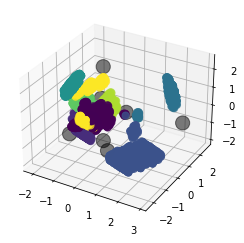

In [67]:
from sklearn import decomposition
fig1 = plt.figure()
fig2 = plt.figure()
ax1 = fig1.add_subplot(111, projection='3d')
ax2 = fig2.add_subplot(111, projection='3d')
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X2 = pca.transform(X)

kmeans = KMeans(n_clusters=9)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

ax2.scatter(X2[:, 0], X2[:, 1], X2[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_

pca = decomposition.PCA(n_components=3)
pca.fit(centers)
centers = pca.transform(centers)
print(centers.shape)
ax2.scatter(centers[:, 0], centers[:, 1], centers[:,2],  c='black', s=200, alpha=0.5);
